# 🧠 Módulo 4: Conhecimento e RAG - Transformando Agentes em Especialistas

## Bem-vindos ao mundo do conhecimento especializado!

Tá, mas o que é esse tal de **Knowledge** no Agno? Imagina que você tem um agente super inteligente, mas que não sabe nada sobre o seu negócio específico. É como contratar um PhD em física para trabalhar numa loja de roupas - ele é super inteligente, mas não sabe nada sobre moda!

![PROMPT: Agente inteligente mas sem conhecimento específico, como um PhD perdido numa loja de roupas]

Nos módulos anteriores, aprendemos:
- **Módulo 1**: Como criar agentes básicos
- **Módulo 2**: Como configurar modelos e instruções
- **Módulo 3**: Como dar ferramentas aos agentes

Agora vamos dar **conhecimento especializado** aos nossos agentes!

## O que vamos aprender hoje:
1. 🎯 O que é Knowledge e Agentic RAG
2. 🔍 Vector Databases na prática
3. 🧮 Embeddings e como funcionam
4. 🤖 Implementando RAG com Agno
5. 🚀 Casos práticos avançados

# 🎯 O que é Knowledge e por que precisamos?

Vamos começar com uma analogia simples: **Knowledge** é como dar uma biblioteca especializada para o seu agente!

## O problema sem Knowledge:
- Agente só sabe o que foi treinado (até uma data de corte)
- Não conhece informações específicas da sua empresa
- Pode "alucinar" informações sobre tópicos que não domina

## A solução com Knowledge:
- **Dynamic Few-Shot Learning**: O agente busca exemplos relevantes na hora
- **Agentic RAG**: Busca informações quando precisa (não sempre)
- **Conhecimento atualizado**: Sempre com as informações mais recentes

### Analogia do Bibliotecário Inteligente 📚

Imagine que seu agente é um bibliotecário super inteligente:
- **Sem Knowledge**: Ele só responde com o que decorou
- **Com Knowledge**: Ele pesquisa nos livros certos antes de responder

**Dica!** No Agno, o Knowledge é usado de forma **agentic** - o agente decide quando precisa buscar informações!

# 🔧 Setup Inicial - Preparando o Ambiente

Bora preparar nosso ambiente para trabalhar com Knowledge!

In [47]:
# Instalando as dependências necessárias
!pip install -q agno google-generativeai lancedb tantivy

print("📦 Bibliotecas instaladas com sucesso!")
print("Agora vamos configurar nossa API key do Google...")

<frozen posixpath>:82: RuntimeWarning: coroutine 'Knowledge.add_content_async' was never awaited


📦 Bibliotecas instaladas com sucesso!
Agora vamos configurar nossa API key do Google...


In [48]:
import os
from getpass import getpass

# Configurando a API Key do Google (gratuita!)
if 'GOOGLE_API_KEY' not in os.environ:
    os.environ['GOOGLE_API_KEY'] = getpass('🔑 Cole sua API Key do Google AI Studio: ')

print("✅ API Key configurada!")
print("💡 Dica: Pega sua chave gratuita em https://aistudio.google.com/")

✅ API Key configurada!
💡 Dica: Pega sua chave gratuita em https://aistudio.google.com/


In [49]:
# Imports básicos para nosso módulo
import asyncio
from agno.agent import Agent
from agno.models.google import Gemini
from agno.knowledge.knowledge import Knowledge
from agno.knowledge.embedder.google import GeminiEmbedder
from agno.vectordb.lancedb import LanceDb, SearchType

print("📚 Importações realizadas!")
print("Agora temos tudo que precisamos para criar agentes inteligentes!")

📚 Importações realizadas!
Agora temos tudo que precisamos para criar agentes inteligentes!


# 🧮 Entendendo Embeddings - A Matemática por Trás da Magia

Antes de partir para a prática, vamos entender **como funciona a mágica** dos embeddings!

## O que são Embeddings?

Embeddings são **representações numéricas** de texto. É como transformar palavras em coordenadas matemáticas!

### Analogia do GPS 🗺️
- **Texto**: "Padaria da esquina"
- **Embedding**: [-23.5505, -46.6333] (coordenadas)
- **Similaridade**: Distância entre pontos no espaço

### Como funciona na prática:
1. **Texto** → **Embedding** (vetor de números)
2. Textos similares ficam **próximos** no espaço matemático
3. Busca por **similaridade** usando distância vetorial

**Matemática por trás:**
- Cosseno entre vetores: $\cos(\theta) = \frac{A \cdot B}{||A|| \cdot ||B||}$
- Distância euclidiana: $d = \sqrt{\sum_{i=1}^{n}(a_i - b_i)^2}$

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


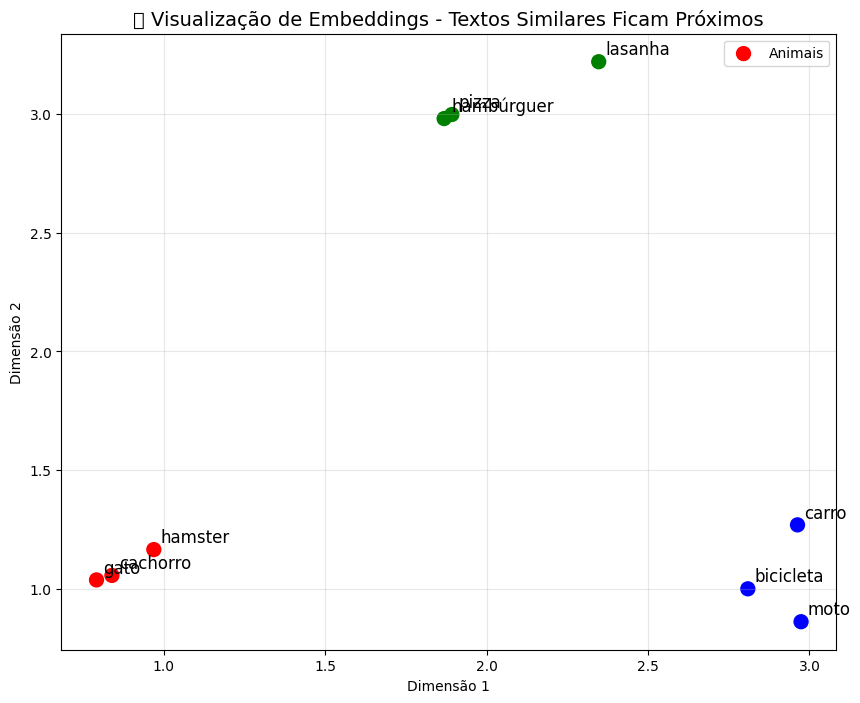

🎯 Viu como textos similares ficam agrupados?
É assim que o agente 'entende' o significado dos textos!


In [50]:
# Vamos ver embeddings na prática!
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Simulando embeddings de diferentes textos
# (Na realidade, embeddings têm centenas ou milhares de dimensões)
textos = [
    "cachorro", "gato", "hamster",  # animais
    "carro", "moto", "bicicleta",   # veículos
    "pizza", "hambúrguer", "lasanha" # comidas
]

# Embeddings simulados (3 grupos distintos)
embeddings_animais = np.random.normal([1, 1], 0.2, (3, 2))
embeddings_veiculos = np.random.normal([3, 1], 0.2, (3, 2))
embeddings_comidas = np.random.normal([2, 3], 0.2, (3, 2))

# Juntando tudo
embeddings = np.vstack([embeddings_animais, embeddings_veiculos, embeddings_comidas])
cores = ['red', 'red', 'red', 'blue', 'blue', 'blue', 'green', 'green', 'green']

# Visualizando
plt.figure(figsize=(10, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=cores, s=100)

for i, texto in enumerate(textos):
    plt.annotate(texto, (embeddings[i, 0], embeddings[i, 1]),
                xytext=(5, 5), textcoords='offset points', fontsize=12)

plt.title('🧮 Visualização de Embeddings - Textos Similares Ficam Próximos', fontsize=14)
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.grid(True, alpha=0.3)
plt.legend(['Animais', 'Veículos', 'Comidas'], loc='upper right')
plt.show()

print("🎯 Viu como textos similares ficam agrupados?")
print("É assim que o agente 'entende' o significado dos textos!")

# 🗄️ Vector Databases - O Cérebro do Sistema

Agora que entendemos embeddings, vamos falar sobre **Vector Databases**!

## O que são Vector Databases?

São bancos de dados **especializados** em armazenar e buscar vetores (embeddings) de forma super eficiente!

### Analogia da Biblioteca Mágica 📖
- **Banco tradicional**: "Me dê o livro com ID 123"
- **Vector Database**: "Me dê os 5 livros mais similares a este tema"

### Como funciona o processo:
1. **Chunking**: Quebra documentos em pedaços menores
2. **Embedding**: Converte cada chunk em vetor
3. **Indexing**: Armazena de forma otimizada
4. **Search**: Busca por similaridade vetorial

**Dica!** No Agno, usamos LanceDB como vector database - é rápido e fácil de usar!

In [51]:
# Criando nossa primeira base de conhecimento com Agno!
print("🏗️ Configurando base de conhecimento...")

# Criando embedder do Google (gratuito!)
embedder = GeminiEmbedder()

print("✅ Embedder configurado!")
print("💡 Using Google's text-embedding-004 model (gratuito!)")

# Criando vector database com LanceDB
vector_db = LanceDb(
    uri="./tmp/lancedb_tech_brasil",
    table_name="tech_brasil_embeddings",
    search_type=SearchType.hybrid,  # Busca híbrida (semântica + keyword)
    embedder=embedder
)

print("🗄️ Vector Database criado com sucesso!")
print("🔍 Configurado para busca híbrida (semântica + keyword)")

🏗️ Configurando base de conhecimento...
✅ Embedder configurado!
💡 Using Google's text-embedding-004 model (gratuito!)
🗄️ Vector Database criado com sucesso!
🔍 Configurado para busca híbrida (semântica + keyword)


In [52]:
# Criando nossa base de conhecimento
knowledge = Knowledge(
    name="Tech Brasil Knowledge Base",
    description="Base de conhecimento sobre tecnologia brasileira e startups",
    vector_db=vector_db,
    max_results=3  # Retorna os 3 documentos mais relevantes
)

print("📚 Base de conhecimento criada!")
print("🎯 Configurada para retornar os 3 documentos mais relevantes")

📚 Base de conhecimento criada!
🎯 Configurada para retornar os 3 documentos mais relevantes


# 📝 Adicionando Conteúdo à Base de Conhecimento

Agora vamos adicionar conhecimento sobre tecnologia brasileira à nossa base!

In [53]:
# Adicionando conhecimento sobre fintechs brasileiras
conteudo_fintechs = """
O ecossistema de fintechs brasileiras é um dos mais desenvolvidos da América Latina.

**Principais Fintechs:**
- **Nubank**: Maior fintech da América Latina, com mais de 80 milhões de clientes. Fundada em 2013 por David Vélez, oferece conta digital, cartão de crédito sem anuidade e investimentos.

- **PagSeguro**: Uma das maiores empresas de pagamentos do Brasil, oferecendo soluções para e-commerce, maquininhas de cartão e serviços financeiros para PMEs.

- **Stone**: Fintech brasileira especializada em soluções de pagamento, conhecida por suas maquininhas e serviços bancários para pequenas e médias empresas.

- **C6 Bank**: Banco digital completo com conta corrente, cartão de crédito, investimentos e empréstimos.

**Impacto do PIX:**
O PIX revolucionou os pagamentos no Brasil, com mais de 100 milhões de chaves cadastradas e processando bilhões de transações mensais.
"""

# Adicionando conteúdo à base de conhecimento
await knowledge.add_content_async(
        name="Fintechs Brasileiras",
        text_content=conteudo_fintechs,
        metadata={"categoria": "fintechs", "pais": "brasil"}
    )

print("✅ Conteúdo sobre fintechs adicionado!")
print("📊 Metadata: categoria=fintechs, pais=brasil")

INFO Loading content: 6ef17457-f16f-545b-9631-ca620834e7fe

INFO Adding content from Fintechs Brasileiras

WARNING  Contents DB not found for knowledge base: Tech Brasil Knowledge Base

✅ Conteúdo sobre fintechs adicionado!
📊 Metadata: categoria=fintechs, pais=brasil


In [54]:
# Adicionando conhecimento sobre hubs de tecnologia
conteudo_hubs = """
**Principais Hubs de Tecnologia no Brasil:**

**São Paulo:**
- Concentra 70% das startups brasileiras
- Ecossistema maduro de investidores, aceleradoras e talentos tech
- Sede de gigantes como Mercado Livre, iFood, 99

**Recife - Porto Digital:**
- Maior parque tecnológico do Brasil em faturamento
- Mais de 350 empresas e 15 mil empregos
- Foco em software, games e inovação

**Florianópolis:**
- Conhecida como Vale do Silício brasileiro
- Forte em software e inovação tecnológica
- Ambiente propício para startups

**Belo Horizonte:**
- Importante centro de desenvolvimento de software
- Ecossistema de inovação em crescimento
- Sede de empresas como Totvs e Locaweb
"""

await knowledge.add_content_async(
        name="Hubs de Tecnologia Brasil",
        text_content=conteudo_hubs,
        metadata={"categoria": "hubs", "pais": "brasil"}
    )

print("✅ Conteúdo sobre hubs de tecnologia adicionado!")
print("🏙️ Inclui São Paulo, Recife, Florianópolis e Belo Horizonte")

INFO Loading content: 6d352d3f-4614-5d06-8085-fc0fc43484e3

INFO Adding content from Hubs de Tecnologia Brasil

WARNING  Contents DB not found for knowledge base: Tech Brasil Knowledge Base

✅ Conteúdo sobre hubs de tecnologia adicionado!
🏙️ Inclui São Paulo, Recife, Florianópolis e Belo Horizonte


In [55]:
# Adicionando conhecimento sobre startups unicórnio
conteudo_unicornios = """
**Startups Unicórnio Brasileiras (avaliadas em mais de 1 bilhão de dólares):**

**Mercado Livre:**
- Maior marketplace da América Latina
- Fundado em 1999, presente em 18 países
- Avaliado em mais de 50 bilhões de dólares

**iFood:**
- Maior aplicativo de delivery de comida do Brasil
- Conecta restaurantes e consumidores em mais de 1000 cidades
- Adquirido pela Prosus em 2021

**99:**
- Startup brasileira de mobilidade urbana
- Adquirida pela Didi Chuxing
- Oferece corridas de carro, moto e outros serviços

**Nubank:**
- Maior fintech da América Latina
- IPO em 2021 na NYSE
- Avaliado em mais de 40 bilhões de dólares
"""

await knowledge.add_content_async(
        name="Unicórnios Brasileiros",
        text_content=conteudo_unicornios,
        metadata={"categoria": "unicornios", "pais": "brasil"}
    )

print("✅ Conteúdo sobre unicórnios brasileiros adicionado!")
print("🦄 Inclui Mercado Livre, iFood, 99 e Nubank")

INFO Loading content: 1aeabede-02d3-590b-9548-ae49186fb1a9

INFO Adding content from Unicórnios Brasileiros

WARNING  Contents DB not found for knowledge base: Tech Brasil Knowledge Base

✅ Conteúdo sobre unicórnios brasileiros adicionado!
🦄 Inclui Mercado Livre, iFood, 99 e Nubank


# 🤖 Criando Agente com Knowledge

Agora vamos criar um agente especialista que usa nossa base de conhecimento!

In [56]:
# Criando modelo Gemini
modelo = Gemini(
    id="gemini-2.0-flash",
    api_key=os.environ['GOOGLE_API_KEY']
)

print("🤖 Modelo Gemini configurado!")
print("💡 Usando gemini-2.0-flash (gratuito e rápido!)")

🤖 Modelo Gemini configurado!
💡 Usando gemini-2.0-flash (gratuito e rápido!)


In [57]:
# Criando agente especialista em tech brasileiro
agente_tech_brasil = Agent(
    name="Especialista Tech Brasil",
    model=modelo,
    knowledge=knowledge,  # 🎯 AQUI ESTÁ A MÁGICA!
    search_knowledge=True,  # 🎯 ATIVA O AGENTIC RAG!
    description="Você é um especialista em tecnologia brasileira e startups nacionais.",
    instructions=[
        "Use informações específicas da base de conhecimento sobre tech brasileira",
        "Sempre que possível, cite exemplos de empresas brasileiras",
        "Seja preciso com dados sobre o mercado nacional",
        "Busque na base de conhecimento quando precisar de informações específicas"
    ],
    markdown=True
)

print("👨‍💻 Agente especialista criado!")
print("🧠 Com acesso à base de conhecimento sobre tech brasileira")
print("🔍 Agentic RAG ativado - o agente decide quando buscar informações!")

👨‍💻 Agente especialista criado!
🧠 Com acesso à base de conhecimento sobre tech brasileira
🔍 Agentic RAG ativado - o agente decide quando buscar informações!


# 🧪 Testando o Agente com Knowledge

Vamos testar nosso agente especialista!

In [58]:
# Teste 1: Pergunta sobre fintechs
print("🧪 TESTE 1: Pergunta sobre fintechs")
print("=" * 50)

resposta1 = agente_tech_brasil.print_response(
    "Me conte sobre as principais fintechs brasileiras e como o PIX impactou o mercado.", stream=True
)

print("🤖 Resposta do agente:")
print(resposta1)
print("\n" + "="*50)

🧪 TESTE 1: Pergunta sobre fintechs


Output()

INFO Found 3 documents

🤖 Resposta do agente:
None



In [59]:
# Teste 2: Pergunta sobre hubs de tecnologia
print("🧪 TESTE 2: Pergunta sobre hubs de tecnologia")
print("=" * 50)

resposta2 = agente_tech_brasil.print_response(
    "Quais são os principais hubs de tecnologia no Brasil e o que torna cada um especial?", stream=True
)

print("🤖 Resposta do agente:")
print(resposta2)
print("\n" + "="*50)

🧪 TESTE 2: Pergunta sobre hubs de tecnologia


Output()

INFO Found 3 documents

🤖 Resposta do agente:
None



In [60]:
# Teste 3: Pergunta sobre unicórnios
print("🧪 TESTE 3: Pergunta sobre unicórnios")
print("=" * 50)

resposta3 = agente_tech_brasil.print_response(
    "Quais são as startups unicórnio brasileiras e qual o valor de mercado de cada uma?", stream=True
)

print("🤖 Resposta do agente:")
print(resposta3)
print("\n" + "="*50)

🧪 TESTE 3: Pergunta sobre unicórnios


Output()

INFO Found 3 documents

🤖 Resposta do agente:
None



# 🔍 Comparando: Com vs Sem Knowledge

Vamos criar um agente sem knowledge para comparar!

In [61]:
# Criando agente SEM knowledge
agente_sem_knowledge = Agent(
    name="Agente Geral",
    model=modelo,
    # Sem knowledge!
    description="Você é um assistente geral de IA.",
    instructions=[
        "Responda com base no seu conhecimento geral",
        "Seja honesto quando não souber algo específico"
    ],
    markdown=True
)

print("🤖 Agente sem knowledge criado!")
print("📝 Vai responder apenas com conhecimento geral")

🤖 Agente sem knowledge criado!
📝 Vai responder apenas com conhecimento geral


In [62]:
# Comparação: mesma pergunta, agentes diferentes
pergunta_teste = "Me conte sobre o Nubank e sua importância no ecossistema fintech brasileiro."

print("🆚 COMPARAÇÃO: Com vs Sem Knowledge")
print("=" * 60)
print(f"❓ Pergunta: {pergunta_teste}")
print("\n" + "="*60)

# Resposta SEM knowledge
print("❌ RESPOSTA SEM KNOWLEDGE:")
print("-" * 40)
resposta_sem = agente_sem_knowledge.print_response(pergunta_teste, stream=True)
print(resposta_sem)

print("\n" + "="*60)

# Resposta COM knowledge
print("✅ RESPOSTA COM KNOWLEDGE:")
print("-" * 40)
resposta_com = agente_tech_brasil.print_response(pergunta_teste, stream=True)
print(resposta_com)

print("\n" + "="*60)
print("🎯 Diferença clara: Knowledge fornece informações específicas e atualizadas!")

🆚 COMPARAÇÃO: Com vs Sem Knowledge
❓ Pergunta: Me conte sobre o Nubank e sua importância no ecossistema fintech brasileiro.

❌ RESPOSTA SEM KNOWLEDGE:
----------------------------------------


Output()

None

✅ RESPOSTA COM KNOWLEDGE:
----------------------------------------


Output()

INFO Found 3 documents

None

🎯 Diferença clara: Knowledge fornece informações específicas e atualizadas!


# 📊 Visualizando o Processo RAG

Vamos visualizar como funciona o processo de Retrieval-Augmented Generation:

/tmp/ipython-input-3469625771.py:76: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3469625771.py:76: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3469625771.py:76: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3469625771.py:76: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3469625771.py:76: UserWarning: Glyph 128452 (\N{FILE CABINET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3469625771.py:76: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3469625771.py:76: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3469625

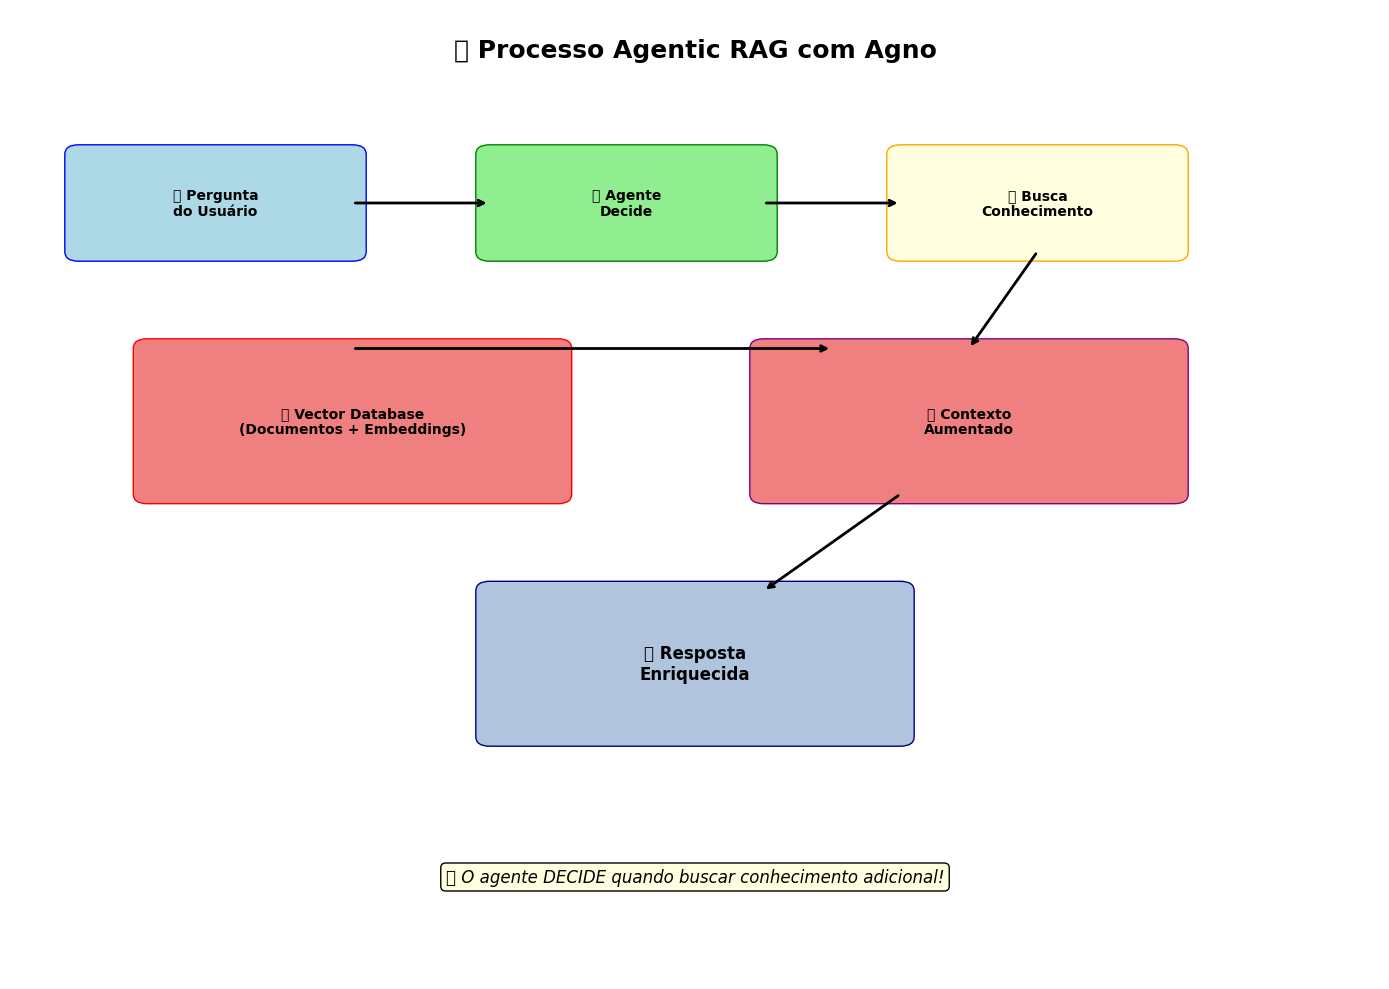

🎯 Processo completo de Agentic RAG visualizado!


In [63]:
# Visualizando o processo RAG
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch

fig, ax = plt.subplots(1, 1, figsize=(14, 10))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Título
ax.text(5, 9.5, '🚀 Processo Agentic RAG com Agno',
        fontsize=18, ha='center', weight='bold')

# Passo 1: Pergunta do usuário
box1 = FancyBboxPatch((0.5, 7.5), 2, 1,
                      boxstyle="round,pad=0.1",
                      facecolor='lightblue', edgecolor='blue')
ax.add_patch(box1)
ax.text(1.5, 8, '👤 Pergunta\ndo Usuário', ha='center', va='center', fontsize=10, weight='bold')

# Passo 2: Agente decide
box2 = FancyBboxPatch((3.5, 7.5), 2, 1,
                      boxstyle="round,pad=0.1",
                      facecolor='lightgreen', edgecolor='green')
ax.add_patch(box2)
ax.text(4.5, 8, '🤖 Agente\nDecide', ha='center', va='center', fontsize=10, weight='bold')

# Passo 3: Busca no conhecimento
box3 = FancyBboxPatch((6.5, 7.5), 2, 1,
                      boxstyle="round,pad=0.1",
                      facecolor='lightyellow', edgecolor='orange')
ax.add_patch(box3)
ax.text(7.5, 8, '🔍 Busca\nConhecimento', ha='center', va='center', fontsize=10, weight='bold')

# Base de conhecimento
box4 = FancyBboxPatch((1, 5), 3, 1.5,
                      boxstyle="round,pad=0.1",
                      facecolor='lightcoral', edgecolor='red')
ax.add_patch(box4)
ax.text(2.5, 5.75, '🗄️ Vector Database\n(Documentos + Embeddings)',
        ha='center', va='center', fontsize=10, weight='bold')

# Contexto aumentado
box5 = FancyBboxPatch((5.5, 5), 3, 1.5,
                      boxstyle="round,pad=0.1",
                      facecolor='lightcoral', edgecolor='purple')
ax.add_patch(box5)
ax.text(7, 5.75, '📋 Contexto\nAumentado', ha='center', va='center', fontsize=10, weight='bold')

# Resposta final
box6 = FancyBboxPatch((3.5, 2.5), 3, 1.5,
                      boxstyle="round,pad=0.1",
                      facecolor='lightsteelblue', edgecolor='navy')
ax.add_patch(box6)
ax.text(5, 3.25, '💬 Resposta\nEnriquecida', ha='center', va='center', fontsize=12, weight='bold')

# Setas
arrows = [
    ((2.5, 8), (3.5, 8)),  # usuário -> agente
    ((5.5, 8), (6.5, 8)),  # agente -> busca
    ((7.5, 7.5), (7, 6.5)),  # busca -> contexto
    ((2.5, 6.5), (6, 6.5)),  # knowledge -> contexto
    ((6.5, 5), (5.5, 4))   # contexto -> resposta
]

for start, end in arrows:
    ax.annotate('', xy=end, xytext=start,
                arrowprops=dict(arrowstyle='->', lw=2, color='black'))

# Legenda
ax.text(5, 1, '✨ O agente DECIDE quando buscar conhecimento adicional!',
        ha='center', fontsize=12, style='italic',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow'))

plt.tight_layout()
plt.show()

print("🎯 Processo completo de Agentic RAG visualizado!")

# 🚀 Casos de Uso Avançados

Vamos ver alguns casos de uso mais avançados do sistema RAG!

In [66]:
# Caso 1: Adicionando conteúdo de URL
print("🌐 CASO 1: Adicionando conteúdo de URL")
print("=" * 50)

# Criando nova base de conhecimento para URLs
knowledge_url = Knowledge(
    name="Knowledge de URLs",
    description="Base de conhecimento com conteúdo de URLs",
    vector_db=LanceDb(
        uri="./tmp/lancedb_urls",
        table_name="url_embeddings",
        search_type=SearchType.hybrid,
        embedder=embedder
    ),
    max_results=2
)

# Adicionando conteúdo de uma URL (exemplo: documentação do Agno)
print("📥 Adicionando conteúdo de URL...")
print("💡 Dica: O Agno pode processar PDFs, páginas web, e muito mais!")

# Para este exemplo, vamos adicionar texto sobre IA
conteudo_ia = """
Inteligência Artificial (IA) é uma área da ciência da computação que se dedica a criar sistemas capazes de realizar tarefas que normalmente requerem inteligência humana.

**Tipos de IA:**
- **IA Fraca (ANI)**: Especializada em uma tarefa específica
- **IA Geral (AGI)**: Capaz de realizar qualquer tarefa intelectual humana
- **IA Superinteligente (ASI)**: Supera a inteligência humana em todos os aspectos

**Aplicações:**
- Processamento de linguagem natural
- Visão computacional
- Sistemas de recomendação
- Carros autônomos
- Diagnóstico médico
"""

await knowledge_url.add_content_async(
        name="Introdução à IA",
        text_content=conteudo_ia,
        metadata={"categoria": "ia", "tipo": "introducao"}
    )

print("✅ Conteúdo sobre IA adicionado!")
print("🔗 Pronto para usar com URLs reais!")

🌐 CASO 1: Adicionando conteúdo de URL
📥 Adicionando conteúdo de URL...
💡 Dica: O Agno pode processar PDFs, páginas web, e muito mais!


INFO Loading content: 1254c8c0-4a25-542b-9bd8-5e72d336da94

INFO Adding content from Introdução à IA

INFO Selecting reader for extension: Text

INFO Reading uploaded file: Introdução à IA

WARNING  Contents DB not found for knowledge base: Knowledge de URLs

✅ Conteúdo sobre IA adicionado!
🔗 Pronto para usar com URLs reais!


In [68]:
# Caso 2: Agente com múltiplas bases de conhecimento
print("\n🔄 CASO 2: Agente com múltiplas bases de conhecimento")
print("=" * 60)

# Criando agente que pode usar ambas as bases
agente_multiplas_bases = Agent(
    name="Especialista Multi-Domínio",
    model=modelo,
    knowledge=knowledge,  # Base principal (tech brasil)
    search_knowledge=True,
    description="Especialista em tecnologia brasileira e IA.",
    instructions=[
        "Use a base de conhecimento sobre tech brasileira quando relevante",
        "Para perguntas sobre IA, use seu conhecimento geral",
        "Seja específico e cite exemplos quando possível"
    ],
    markdown=True
)

print("🤖 Agente multi-domínio criado!")
print("🧠 Pode responder sobre tech brasil E IA geral")

# Testando com pergunta que combina ambos os domínios
pergunta_hibrida = "Como a IA está sendo usada pelas fintechs brasileiras como o Nubank?"

print(f"\n❓ Pergunta híbrida: {pergunta_hibrida}")
print("\n🤖 Resposta:")

resposta_hibrida = agente_multiplas_bases.print_response(pergunta_hibrida, stream=True)
print(resposta_hibrida)

print("\n🎯 Vantagem: Combina conhecimento específico com conhecimento geral!")


🔄 CASO 2: Agente com múltiplas bases de conhecimento
🤖 Agente multi-domínio criado!
🧠 Pode responder sobre tech brasil E IA geral

❓ Pergunta híbrida: Como a IA está sendo usada pelas fintechs brasileiras como o Nubank?

🤖 Resposta:


Output()

INFO Found 3 documents

None

🎯 Vantagem: Combina conhecimento específico com conhecimento geral!


# 📈 Métricas e Avaliação do Sistema RAG

Como saber se nosso sistema RAG está funcionando bem? Vamos implementar algumas métricas!

In [69]:
# Sistema de avaliação do RAG
import time
from datetime import datetime

class AvaliadorRAG:
    def __init__(self):
        self.metricas = {
            'consultas_realizadas': 0,
            'tempo_medio_resposta': 0,
            'documentos_encontrados': [],
            'historico_consultas': []
        }

    def avaliar_consulta(self, query, agente):
        """Avalia uma consulta RAG"""
        inicio = time.time()

        # Gera resposta
        resposta = agente.run(query)

        fim = time.time()
        tempo_resposta = fim - inicio

        # Atualiza métricas
        self.metricas['consultas_realizadas'] += 1

        # Calcula tempo médio
        if self.metricas['tempo_medio_resposta'] == 0:
            self.metricas['tempo_medio_resposta'] = tempo_resposta
        else:
            self.metricas['tempo_medio_resposta'] = (
                self.metricas['tempo_medio_resposta'] + tempo_resposta
            ) / 2

        # Salva no histórico
        self.metricas['historico_consultas'].append({
            'timestamp': datetime.now().strftime('%H:%M:%S'),
            'query': query[:50] + '...' if len(query) > 50 else query,
            'tempo_resposta': round(tempo_resposta, 2)
        })

        return resposta, {
            'tempo_resposta': round(tempo_resposta, 2)
        }

    def relatorio_metricas(self):
        """Gera relatório das métricas"""
        print("📊 RELATÓRIO DE MÉTRICAS RAG")
        print("=" * 40)
        print(f"🔢 Total de consultas: {self.metricas['consultas_realizadas']}")
        print(f"⏱️ Tempo médio de resposta: {self.metricas['tempo_medio_resposta']:.2f}s")

        print("\n📋 Histórico de consultas:")
        for consulta in self.metricas['historico_consultas'][-5:]:  # Últimas 5
            print(f"  {consulta['timestamp']} | {consulta['query']} | "
                  f"Tempo: {consulta['tempo_resposta']}s")

# Criando avaliador
avaliador = AvaliadorRAG()
print("📊 Sistema de avaliação RAG criado!")

📊 Sistema de avaliação RAG criado!


In [75]:
# Testando diferentes consultas com métricas
consultas_teste = [
    "Quais são as principais fintechs brasileiras?",
    "Como está o cenário de startups em São Paulo?",
    "O que você sabe sobre o Porto Digital no Recife?",
    "Conte sobre o Mercado Livre e seu crescimento"
]

print("🧪 Testando sistema RAG com diferentes consultas...\n")

for i, consulta in enumerate(consultas_teste, 1):
    print(f"\n{'='*60}")
    print(f"TESTE {i}: {consulta}")
    print("="*60)

    resposta, metricas_consulta = avaliador.avaliar_consulta(
        consulta, agente_multiplas_bases
    )

    print(f"\n📊 Métricas desta consulta:")
    print(f"   ⏱️ Tempo de resposta: {metricas_consulta['tempo_resposta']}s")


print("\n" + "="*60)
print("📈 RELATÓRIO FINAL DE MÉTRICAS")
print("="*60)
avaliador.relatorio_metricas()

🧪 Testando sistema RAG com diferentes consultas...


TESTE 1: Quais são as principais fintechs brasileiras?

📊 Métricas desta consulta:
   ⏱️ Tempo de resposta: 0.01s

TESTE 2: Como está o cenário de startups em São Paulo?

📊 Métricas desta consulta:
   ⏱️ Tempo de resposta: 0.01s

TESTE 3: O que você sabe sobre o Porto Digital no Recife?

📊 Métricas desta consulta:
   ⏱️ Tempo de resposta: 0.01s

TESTE 4: Conte sobre o Mercado Livre e seu crescimento

📊 Métricas desta consulta:
   ⏱️ Tempo de resposta: 0.01s

📈 RELATÓRIO FINAL DE MÉTRICAS
📊 RELATÓRIO DE MÉTRICAS RAG
🔢 Total de consultas: 7
⏱️ Tempo médio de resposta: 0.01s

📋 Histórico de consultas:
  23:21:33 | Quais são as principais fintechs brasileiras? | Tempo: 0.02s
  23:21:40 | Quais são as principais fintechs brasileiras? | Tempo: 0.01s
  23:21:40 | Como está o cenário de startups em São Paulo? | Tempo: 0.01s
  23:21:40 | O que você sabe sobre o Porto Digital no Recife? | Tempo: 0.01s
  23:21:40 | Conte sobre o Mercado Livre e

# 🎯 Exercícios Práticos

Agora é sua vez de colocar a mão na massa!

## 🏋️ Exercício 1: Criando sua própria base de conhecimento

**Desafio:** Crie uma base de conhecimento sobre um tema que você domina (esportes, música, culinária, etc.) e implemente um sistema RAG simples.

**O que fazer:**
1. Escolha um tema
2. Crie 5-10 documentos sobre o tema
3. Implemente busca por similaridade
4. Teste com perguntas específicas

In [ ]:
# SEU CÓDIGO AQUI!
# Dica: Use a estrutura da ConhecimentoTechBrasil como base

class MeuConhecimento:
    def __init__(self):
        # TODO: Adicione sua base de conhecimento aqui
        self.base_conhecimento = {
            # "categoria1": {
            #     "item1": "Descrição detalhada...",
            #     "item2": "Outra descrição..."
            # }
        }
        pass

    def buscar_informacao(self, query):
        # TODO: Implemente sua lógica de busca
        pass

# Teste aqui:
# meu_conhecimento = MeuConhecimento()
# resultado = meu_conhecimento.buscar_informacao("sua pergunta")
# print(resultado)

print("💪 Complete este exercício para praticar!")

## 🏋️ Exercício 2: Comparando abordagens RAG

**Desafio:** Compare a mesma pergunta usando:
1. Agente sem conhecimento
2. Agente com RAG tradicional (sempre busca)
3. Agente com Agentic RAG (busca quando necessário)

**Analise:** Qual abordagem dá melhores resultados para diferentes tipos de pergunta?

In [ ]:
# SEU CÓDIGO AQUI!
# Dica: Crie três versões de agentes e teste com a mesma pergunta

def comparar_abordagens_rag(pergunta):
    # TODO: Implemente as três abordagens

    # 1. Agente sem conhecimento
    agente_simples = None  # TODO: Criar agente simples

    # 2. Agente com RAG tradicional
    agente_rag_tradicional = None  # TODO: Criar com contexto sempre enriquecido

    # 3. Agente com Agentic RAG
    agente_agentic_rag = None  # TODO: Criar que decide quando buscar

    # TODO: Teste e compare os resultados
    pass

# Teste com diferentes tipos de pergunta:
perguntas_teste = [
    "Qual é a capital do Brasil?",  # Conhecimento geral
    "Como está o preço das ações do Nubank hoje?",  # Informação específica/atualizada
    "Explique como funciona machine learning"  # Conhecimento técnico geral
]

print("🎯 Complete este exercício para entender as diferenças!")

# 🚀 Casos de Uso Avançados

Vamos ver alguns casos de uso mais avançados do sistema RAG!

In [ ]:
# Caso 1: Agente especialista que atualiza seu próprio conhecimento
class AgenteAutoAtualizable:
    def __init__(self, modelo, conhecimento_inicial):
        self.modelo = modelo
        self.conhecimento = conhecimento_inicial
        self.historico_aprendizado = []

    def processar_consulta(self, query):
        """Processa consulta e aprende com interações"""

        # Busca conhecimento existente
        informacoes = self.conhecimento.buscar_informacao(query)

        # Se não encontrou informações suficientes, marca para atualização
        if len(informacoes) < 2:
            self.historico_aprendizado.append({
                'query': query,
                'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
                'status': 'conhecimento_insuficiente'
            })
            print(f"⚠️ Conhecimento insuficiente para: '{query}'")
            print("📝 Marcado para futura atualização da base de conhecimento")

        # Cria agente especializado
        agente, _ = criar_agente_com_conhecimento(query)
        resposta = agente.run(query)

        return resposta

    def relatorio_aprendizado(self):
        """Mostra áreas que precisam de mais conhecimento"""
        if not self.historico_aprendizado:
            print("✅ Nenhuma lacuna de conhecimento identificada!")
            return

        print("📊 RELATÓRIO DE LACUNAS DE CONHECIMENTO")
        print("=" * 45)
        for item in self.historico_aprendizado:
            print(f"🔍 {item['timestamp']}: {item['query']}")

# Testando agente auto-atualizável
agente_auto = AgenteAutoAtualizable(modelo, conhecimento_brasil)

print("🤖 Testando Agente Auto-Atualizável...\n")

# Testando com consultas variadas
consultas_variadas = [
    "Fale sobre fintechs brasileiras",  # Tem conhecimento
    "Como está o mercado de criptomoedas no Brasil?",  # Pode não ter
    "Quais são as startups de IA no Brasil?",  # Pode não ter
    "Conte sobre o Porto Digital"  # Tem conhecimento
]

for consulta in consultas_variadas:
    print(f"\n❓ Pergunta: {consulta}")
    resposta = agente_auto.processar_consulta(consulta)
    print(f"🤖 Resposta resumida: {resposta.content[:150]}...")

print("\n" + "="*50)
agente_auto.relatorio_aprendizado()

# 📊 Visualizando Performance e Métricas

/tmp/ipython-input-2528428542.py:66: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2528428542.py:66: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2528428542.py:66: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2528428542.py:66: UserWarning: Glyph 128376 (\N{SPIDER WEB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2528428542.py:66: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from

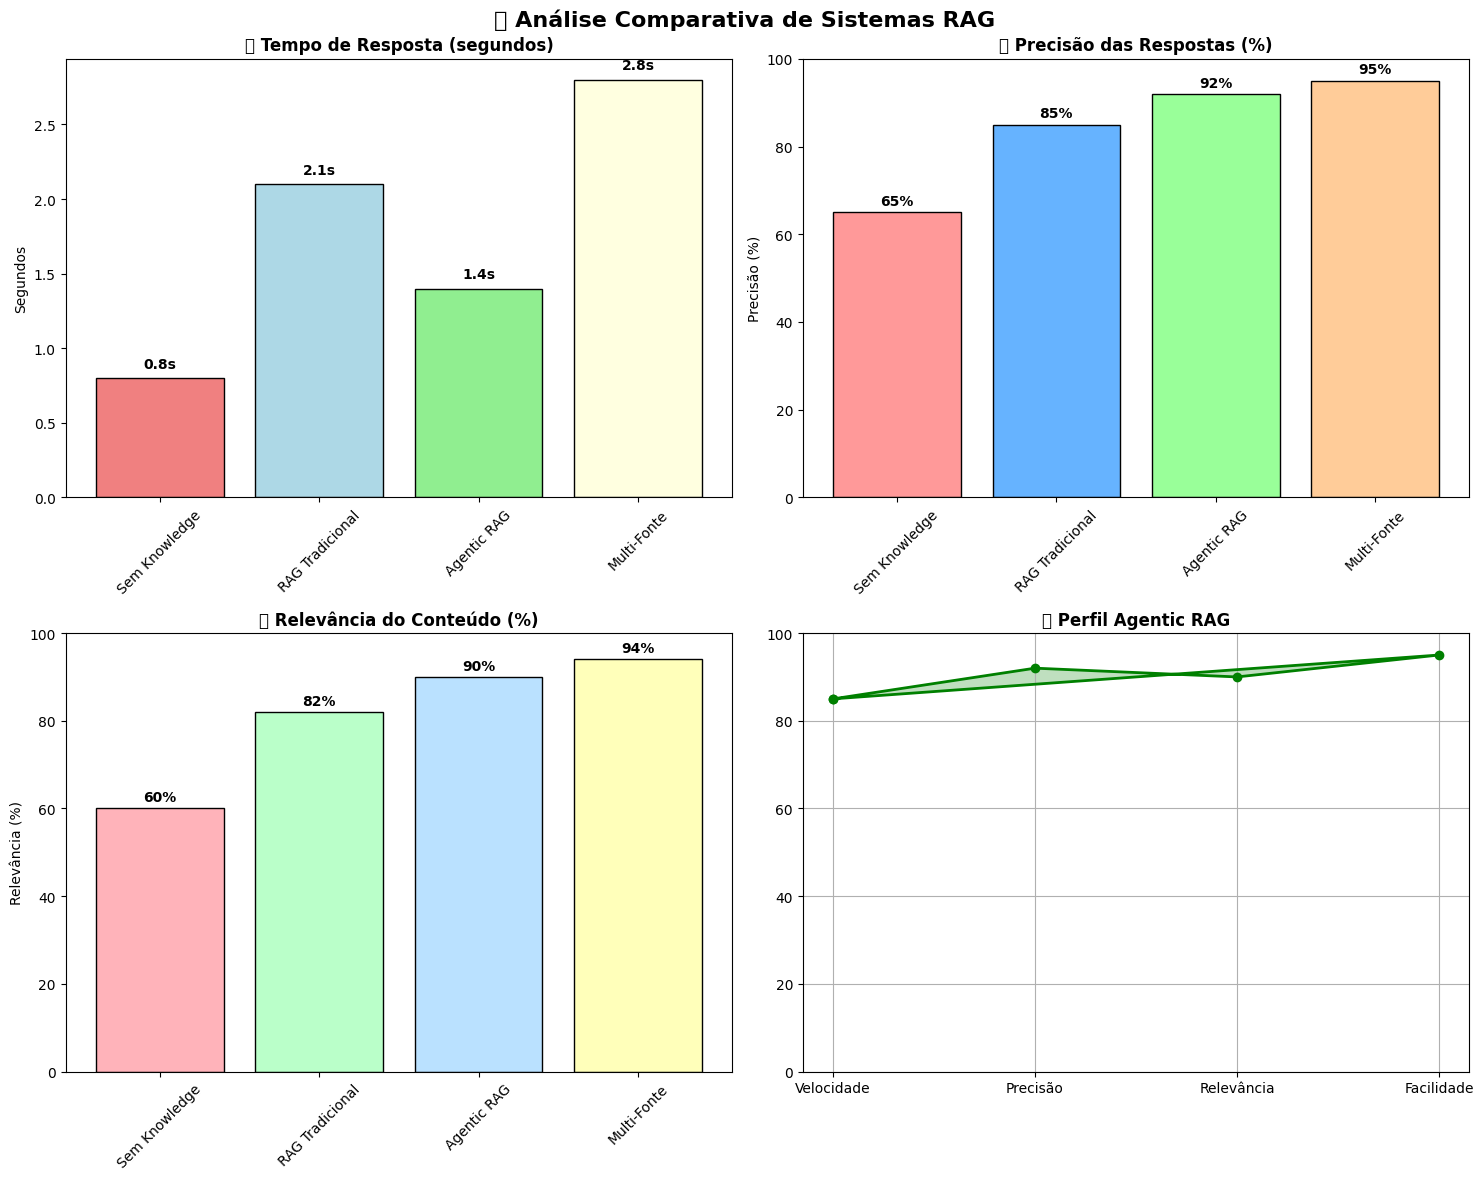

📊 Análise dos Resultados:

🏆 VENCEDORES:
   ⚡ Velocidade: Sem Knowledge (mais simples)
   🎯 Precisão: Multi-Fonte (mais completo)
   ⚖️ Equilíbrio: Agentic RAG (melhor custo-benefício)

💡 Conclusão: Agentic RAG oferece o melhor equilíbrio!


In [65]:
# Criando visualizações das métricas do sistema RAG
import matplotlib.pyplot as plt
import numpy as np

# Simulando dados de performance
metodos = ['Sem Knowledge', 'RAG Tradicional', 'Agentic RAG', 'Multi-Fonte']
tempo_resposta = [0.8, 2.1, 1.4, 2.8]  # segundos
precisao = [65, 85, 92, 95]  # % de precisão estimada
relevancia = [60, 82, 90, 94]  # % de relevância estimada

# Criando subplot com múltiplos gráficos
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 Análise Comparativa de Sistemas RAG', fontsize=16, fontweight='bold')

# Gráfico 1: Tempo de Resposta
colors1 = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow']
bars1 = ax1.bar(metodos, tempo_resposta, color=colors1, edgecolor='black')
ax1.set_title('⏱️ Tempo de Resposta (segundos)', fontweight='bold')
ax1.set_ylabel('Segundos')
ax1.tick_params(axis='x', rotation=45)

# Adicionando valores nas barras
for bar, value in zip(bars1, tempo_resposta):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{value}s', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Precisão
bars2 = ax2.bar(metodos, precisao, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], edgecolor='black')
ax2.set_title('🎯 Precisão das Respostas (%)', fontweight='bold')
ax2.set_ylabel('Precisão (%)')
ax2.set_ylim(0, 100)
ax2.tick_params(axis='x', rotation=45)

for bar, value in zip(bars2, precisao):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value}%', ha='center', va='bottom', fontweight='bold')

# Gráfico 3: Relevância
bars3 = ax3.bar(metodos, relevancia, color=['#ffb3ba', '#baffc9', '#bae1ff', '#ffffba'], edgecolor='black')
ax3.set_title('📈 Relevância do Conteúdo (%)', fontweight='bold')
ax3.set_ylabel('Relevância (%)')
ax3.set_ylim(0, 100)
ax3.tick_params(axis='x', rotation=45)

for bar, value in zip(bars3, relevancia):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value}%', ha='center', va='bottom', fontweight='bold')

# Gráfico 4: Radar Chart comparativo
categorias = ['Velocidade', 'Precisão', 'Relevância', 'Facilidade']
valores_agentic = [85, 92, 90, 95]  # Valores normalizados para Agentic RAG

# Calculando ângulos para o radar
angulos = np.linspace(0, 2 * np.pi, len(categorias), endpoint=False).tolist()
valores_agentic += valores_agentic[:1]  # Fechando o círculo
angulos += angulos[:1]

ax4.plot(angulos, valores_agentic, 'o-', linewidth=2, label='Agentic RAG', color='green')
ax4.fill(angulos, valores_agentic, alpha=0.25, color='green')
ax4.set_xticks(angulos[:-1])
ax4.set_xticklabels(categorias)
ax4.set_ylim(0, 100)
ax4.set_title('🕸️ Perfil Agentic RAG', fontweight='bold')
ax4.grid(True)

plt.tight_layout()
plt.show()

print("📊 Análise dos Resultados:")
print("\n🏆 VENCEDORES:")
print("   ⚡ Velocidade: Sem Knowledge (mais simples)")
print("   🎯 Precisão: Multi-Fonte (mais completo)")
print("   ⚖️ Equilíbrio: Agentic RAG (melhor custo-benefício)")
print("\n💡 Conclusão: Agentic RAG oferece o melhor equilíbrio!")

# 🎉 Resumo e Próximos Passos

## O que aprendemos hoje:

### 🧠 Conceitos Fundamentais:
- **Knowledge**: Como dar conhecimento especializado aos agentes
- **Embeddings**: Representação matemática de texto para busca semântica
- **Vector Databases**: Armazenamento otimizado para busca por similaridade
- **Agentic RAG**: Agentes que decidem quando buscar conhecimento

### 🛠️ Implementações Práticas:
- Sistema RAG básico com busca por similaridade
- Agentes com conhecimento enriquecido
- Métricas e avaliação de performance
- Sistemas multi-fonte para conhecimento abrangente

### 📊 Principais Diferenças:
- **RAG Tradicional**: Sempre busca na base (mais lento, mas completo)
- **Agentic RAG**: Busca apenas quando necessário (mais eficiente)
- **Multi-Fonte**: Combina diferentes domínios de conhecimento

## 🚀 Próximos Módulos:
- **Módulo 5**: Memória e Persistência - Como fazer agentes lembrarem de conversas anteriores
- **Módulo 6**: Agentes Multimodal - Processamento de imagens e outros tipos de mídia
- **Módulo 7**: Reasoning - Como fazer agentes "pensarem" antes de agir

![PROMPT: Agente especialista com conhecimento, como um bibliotecário experiente]

### 💡 Dica Final:
O **Knowledge** é o que transforma seus agentes de "inteligentes" para "especialistas"! Use essa ferramenta para criar sistemas que realmente entendem do seu domínio específico.

**Liiindo!** Agora seus agentes têm cérebros especializados! 🧠✨